Ensemble technique : Combining multiple models to improve overall performance.The primary goal is to reduce errors,including variance,bais or both 

Bagging Technique: It is a ensemble technique which involves training multiple models on different subsets of the training data and then combining their prediction. Each subset is created by randomly sampling with replacement from the original dataset.

Regression : Avg of all predicted model will be selected
Classificaion : majority of accuracy voting will be selected 
 Ex: Random Forest Classifier 

Boosting Technique : It is a ensemble technique which involves combining the output of several weak leaners to create a strong learner.The primary goal of boosting is to improve the predictive accuracy of model by sequentially adding models that corrects the errors mode by previous error.

weak learner: Haven't learnt much from the training dataset
Ex: ADAboost,Gradient Boosting,XGboost

Random Forest Classifier:
A Random Forest classifier is an ensemble learning method that combines multiple decision trees to improve the classification performance. It is particularly effective for a variety of classification and regression tasks due to its ability to handle large datasets with higher dimensionality, deal with missing values, and mitigate overfitting.

why should we use random forest instead of Decision Tree:?
-> To improve accuracy
-> Reduce overfitting 
-> Better Generalization 
-> Handling high dimentionality
-> Generalized model 

OOB Score : the data which is missed to train in training phase i.e out of bag score (validation data )

Random Forest Classifier 

In [28]:
import warnings 
warnings.filterwarnings('ignore')

import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [2]:
data=sns.load_dataset('tips')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
data.shape

(244, 7)

In [4]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
data.duplicated().sum()

1

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.describe()

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


In [9]:
data['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [10]:
data['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [11]:
data.time

0      Dinner
1      Dinner
2      Dinner
3      Dinner
4      Dinner
        ...  
239    Dinner
240    Dinner
241    Dinner
242    Dinner
243    Dinner
Name: time, Length: 243, dtype: category
Categories (2, object): ['Lunch', 'Dinner']

Data Visualization

array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'size'}>, <Axes: >]], dtype=object)

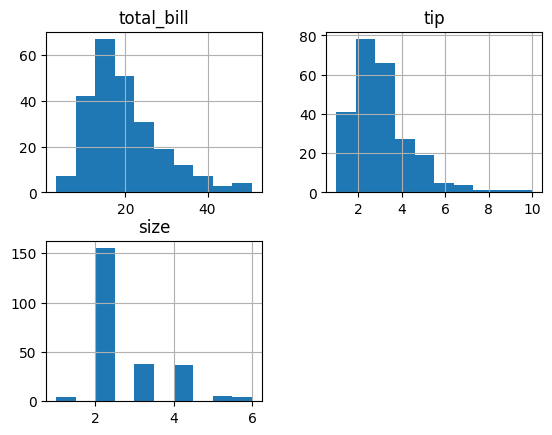

In [12]:
data.hist()

<Axes: xlabel='time', ylabel='count'>

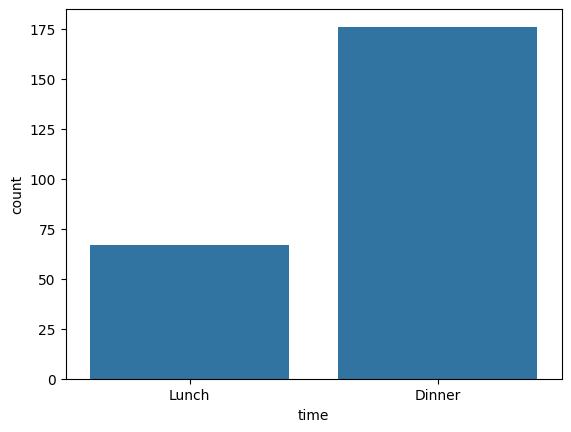

In [13]:
sns.countplot(x='time',data=data)

<Axes: >

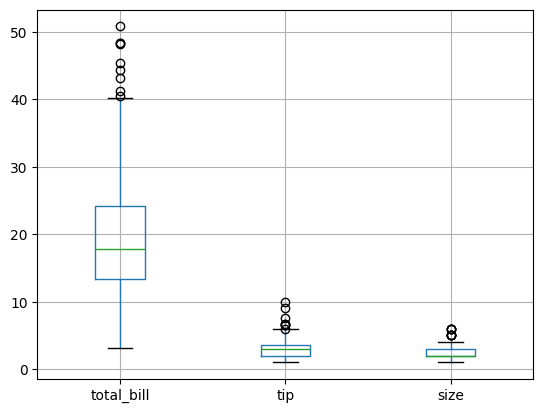

In [14]:
data.boxplot()

In [15]:
# Outlier removal 
num_cols = data.select_dtypes(include=[float, int]).columns
categorical_cols = data.select_dtypes(include=[object, 'category']).columns
# Detect outliers using IQR method
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a function to identify outliers
def detect_outliers_iqr(data):
    outliers = ((data[num_cols] < (Q1 - 1.5 * IQR)) | (data[num_cols] > (Q3 + 1.5 * IQR)))
    return outliers

# Apply the function to the dataframe
outliers = detect_outliers_iqr(data)

# Print outliers summary
print(outliers.sum())

total_bill    9
tip           8
size          9
dtype: int64


In [16]:
data = data[~outliers.any(axis=1)]
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: >

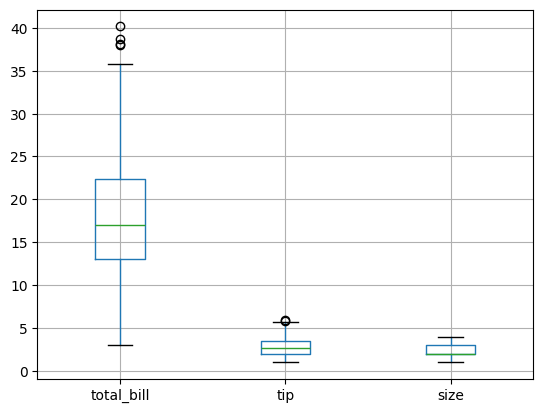

In [17]:
data.boxplot()

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (223, 7)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  4
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of D

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
total_bill,float64,0.000000,NA,3.070000,40.170000,Column has 4 outliers greater than upper bound (36.19) or lower than lower bound(-0.79). Cap them or remove them.
tip,float64,0.000000,NA,1.000000,5.920000,Column has 2 outliers greater than upper bound (5.73) or lower than lower bound(-0.24). Cap them or remove them.
sex,category,0.000000,0,,,No issue
smoker,category,0.000000,0,,,No issue
day,category,0.000000,1,,,No issue
time,category,0.000000,0,,,No issue
size,int64,0.000000,1,1.000000,4.000000,No issue


Number of All Scatter Plots = 3


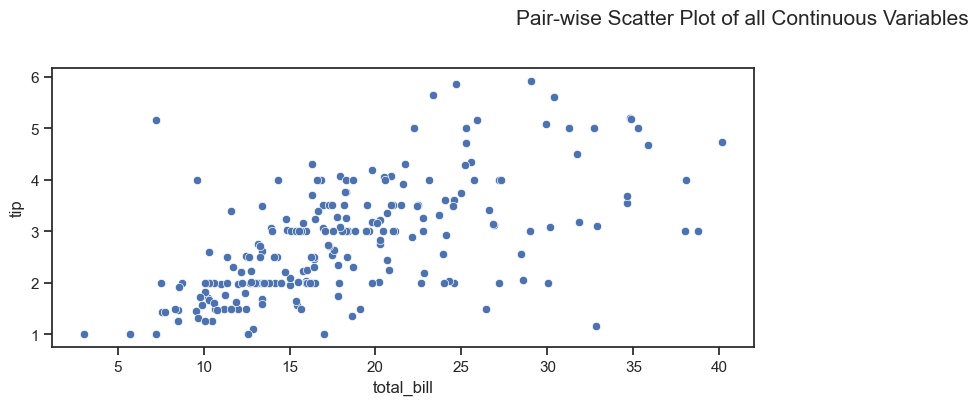

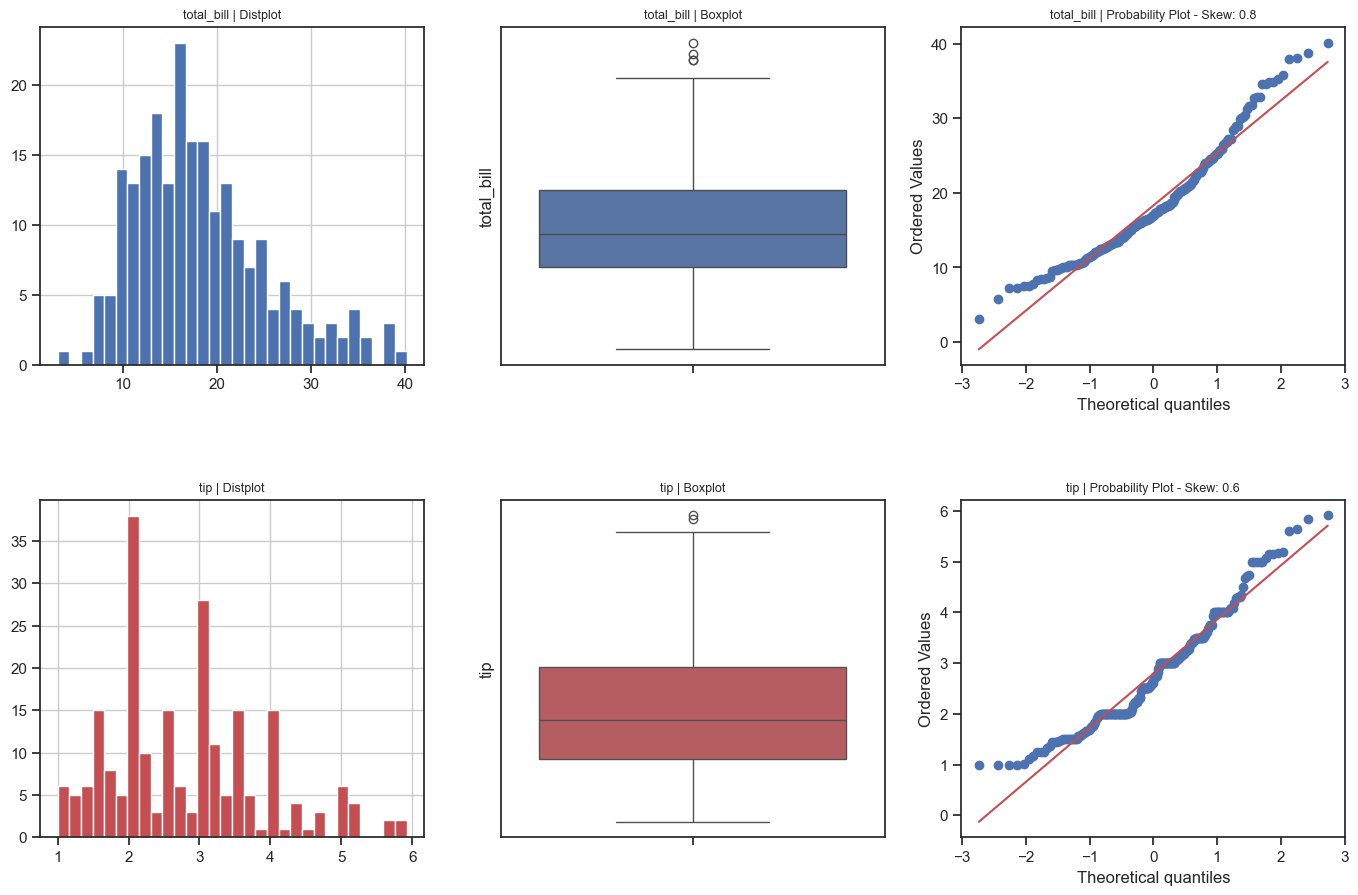

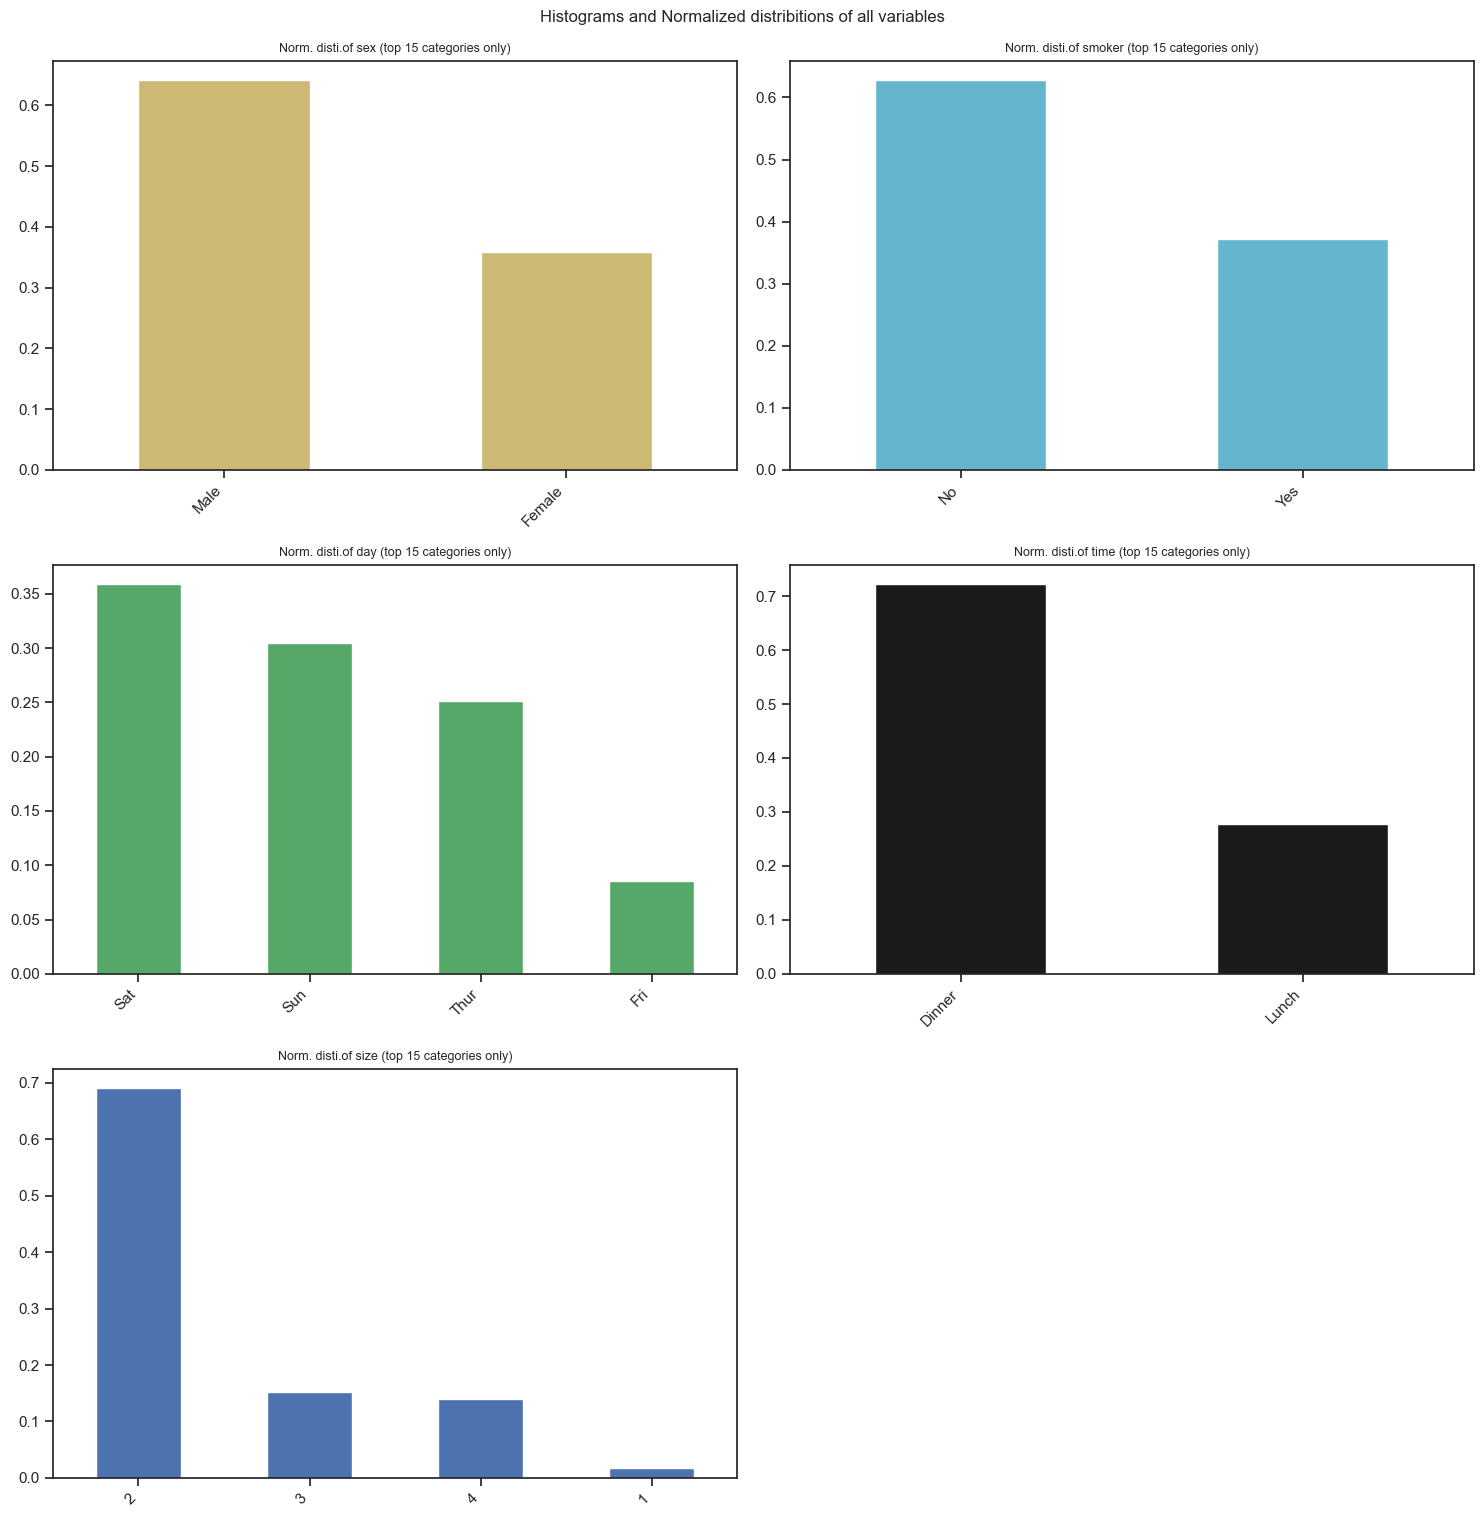

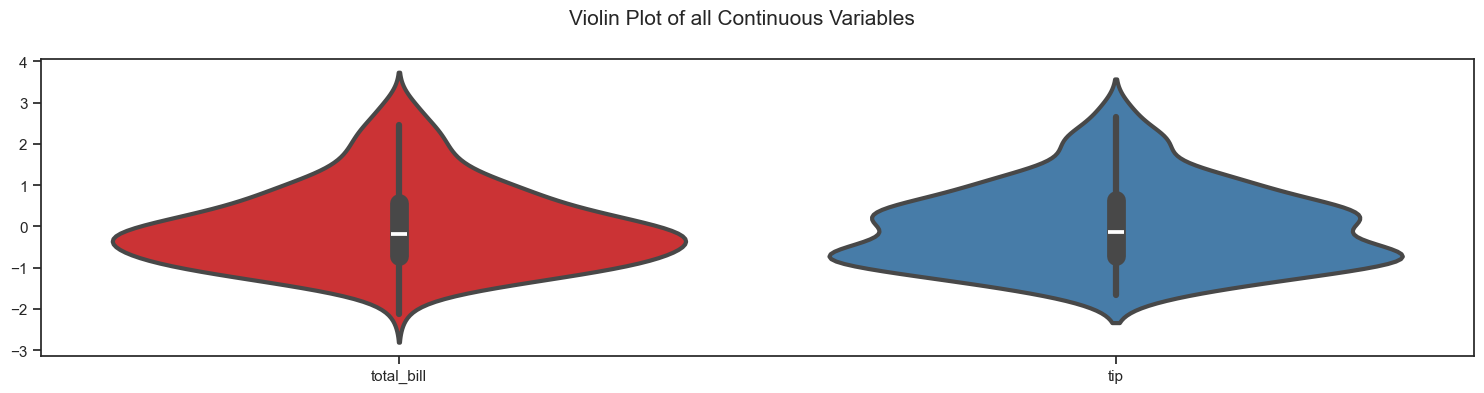

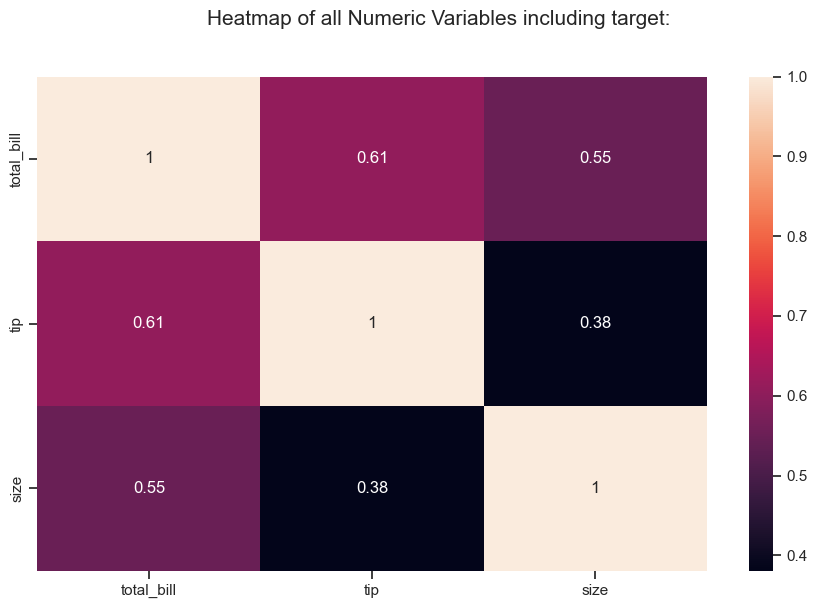

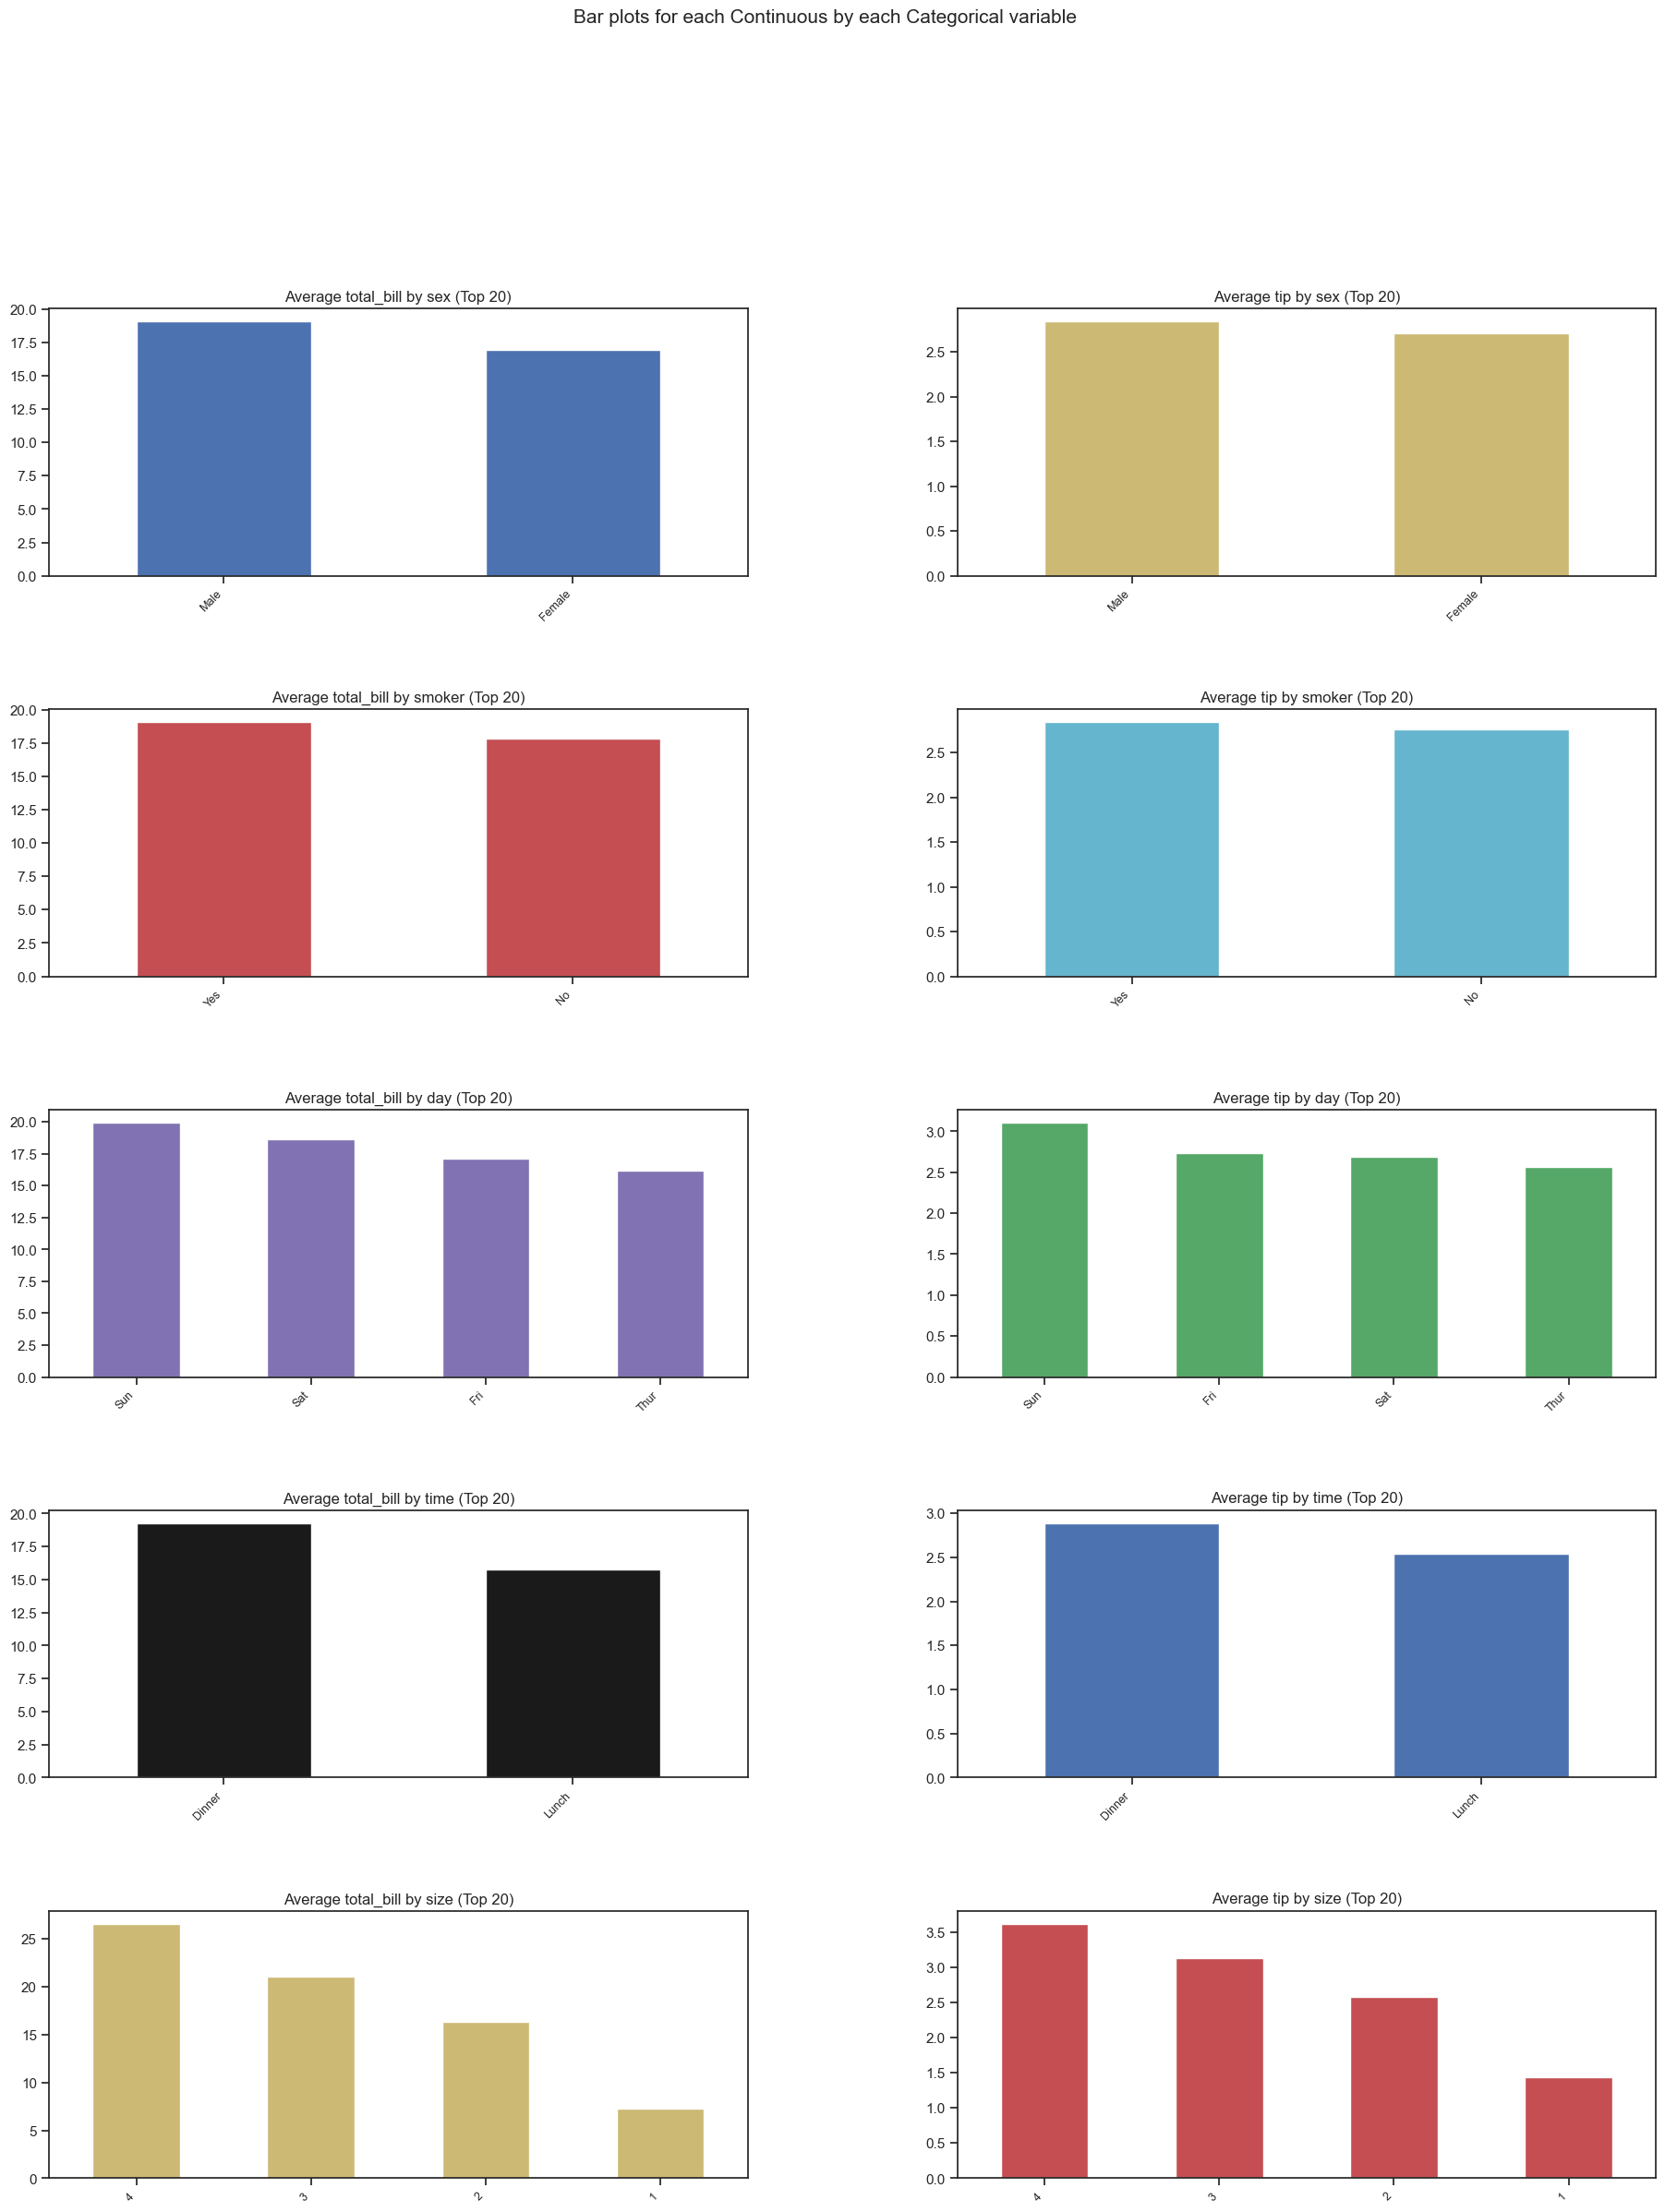

All Plots done
Time to run AutoViz = 7 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [18]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()

filename=data
dft=AV.AutoViz(
    filename
)

Data Encoding

In [20]:
label=LabelEncoder()
for column in data.select_dtypes(include=['object','category','bool']).columns:
    data[column]=label.fit_transform(data[column])
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
5,25.29,4.71,1,0,2,0,4
6,8.77,2.00,1,0,2,0,2
7,26.88,3.12,1,0,2,0,4
8,15.04,1.96,1,0,2,0,2
9,14.78,3.23,1,0,2,0,2


Split the data

In [22]:
x=data.drop(['time'],axis=1)
y=data['time']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((156, 6), (67, 6), (156,), (67,))

Standardization :

In [26]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

Model Building

In [30]:
clf= RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
print("Training Accuracy :", clf.score(x_train, y_train))
print("Testing Accuracy :", clf.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.9850746268656716


In [33]:
# Predict sentiment on the test set
y_pred = clf.predict(x_test)

# Calculate accuracy
Rf_accuracy= accuracy_score(y_test, y_pred)
print(Rf_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

0.9850746268656716

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.95      0.98        21

    accuracy                           0.99        67
   macro avg       0.99      0.98      0.98        67
weighted avg       0.99      0.99      0.98        67


Confusion Matrix:
[[46  0]
 [ 1 20]]


In [ ]:
params={'max_depth':[2,3,5,10,20],
        'min_samples_leaf':[5,10,20,50,100,200],
        'n_estimators':[10,25,30,50,100,200]     
       }

clf=GridSearchCV(clf,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")
clf.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


In [ ]:
clf.best_params_

In [ ]:
print("Training Accuracy :", clf.score(x_train, y_train))
print("Testing Accuracy :", clf.score(x_test, y_test))